# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Nima Kelidari
2.   Student Number: 98108124


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [4]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive/Deep_learning/HW1

/content/gdrive/MyDrive/Deep_learning/HW1


In [7]:
dataset = pd.read_csv("./data/data01.csv")
print(dataset)



# implement the split part
# name them: x_train, x_test, y_train, y_test

train_dataset = dataset.sample(frac=0.8, replace=False, random_state=1)
test_dataset=dataset.drop(train_dataset.index)
l_train = train_dataset.shape[0]
l_test = test_dataset.shape[0]


x_train = np.array(train_dataset.X).reshape(l_train,1)
y_train = np.array(train_dataset.Y).reshape(l_train,1)

x_test = np.array(test_dataset.X).reshape(l_test,1)
y_test = np.array(test_dataset.Y).reshape(l_test,1)



     Unnamed: 0         X         Y
0             0  1.867470 -1.210867
1             1  1.168675 -0.011459
2             2  0.795181 -0.882124
3             3  1.477912  0.006529
4             4  1.646586 -0.602546
..          ...       ...       ...
495         495  1.907631 -1.596070
496         496  1.706827 -0.847200
497         497  0.092369  0.439343
498         498  1.084337 -0.431515
499         499  0.493976  0.427420

[500 rows x 3 columns]


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [8]:
from numpy.core.memmap import dtype
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A_vector = x_train
A_vector = np.hstack((A_vector,np.ones((l_train,1),dtype=np.float64)))
y_Vector = np.array(y_train).reshape(l_train,1)

m = np.linalg.inv(A_vector.T @  A_vector)@((A_vector).T @ y_Vector)

In [9]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.sum((y_train-predicted_train_y)**2)/len(y_train)
test_error = np.sum((y_test-predicted_test_y)**2)/len(y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3140290524996677
MSE test error: 0.39731482572060345


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

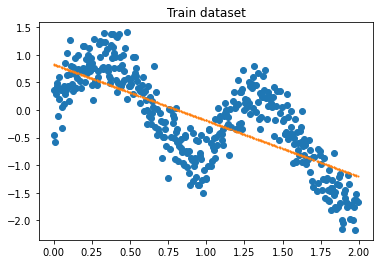

In [10]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

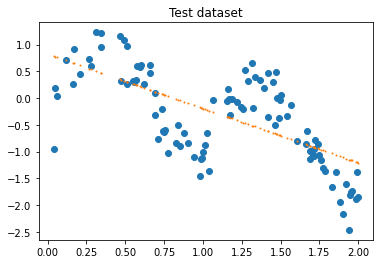

In [11]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? 

What about the line you drew in the last part? 

Was it appropriate for the dataset? 
<br><br/>
Explain what are the main problems here.

 **No, they were not good, this model predicted this dataset well as linear regression ; but generally error in unacceptable. in my opinion, second-degree regression is more appropriate for this dataset.**

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [12]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
      q = np.array([np.sum(the_query_point[0,0]),1])
      W[i, i] = np.exp(-(np.transpose(xi-q) @ (xi-q))/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [13]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_dataset.shape[0]
    X = np.hstack((train_X.reshape(l,1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.inv(np.transpose(X) @ W @ X)@(np.transpose(X) @ W @ train_Y)
    print(theta.shape)
    return np.sum(np.dot(qx, theta))[0]

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [14]:
hyperparameter=0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]

error = np.sum((y_test-predicted_test)**2)/len(y_test)

print(f"MSE test error: {error}")


/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
MSE test error: 0.11280268817178454


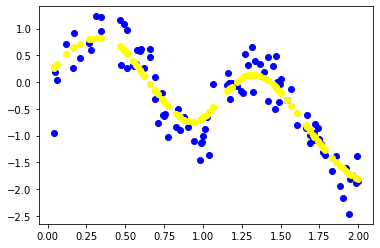

In [15]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

 **Yse, it's absolutly better, because every single point of plot finds by a group of training point in limited range near by that; so we can estimate regression line more accurate. low MSE error can prove it for us.**

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

 **I prsonnaly think this method should prform better than last part.**

### Part10:
Implementing the `KNN model`.

In [16]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        
        self.k = number_neighbours
        self.X = X
        self.Y = Y
        

    def distance(self, x1, x2):
        distance = np.abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
      indices = []
      distances = []
      for x1 in self.X:
        distances.append(self.distance(x1,x))
         # find indices of k nearest neighbours to x
      for ittration in range(k):
        least = np.inf
        least_index = 0
        for i,d in enumerate(distances):
          if least>d :
            least_index = i
            least = d
            distances[i]=np.inf
        indices.append([self.Y[least_index,0]])
      
      return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.sum(neareest_indices)/np.size(neareest_indices)
        return predicted_y

In [17]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.array([model.predict(x) for x in x_test]).reshape(l_test,1)
    error = np.sum((y_test-predicted_y)**2)/len(y_test)
    return error, predicted_y

In [18]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.110540112844778


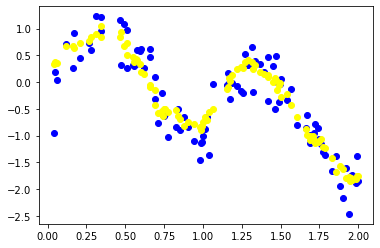

In [19]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

**KNN regression has a bit less MSE error than other models in this quistion. but we can't consider this results as a line or polynomial. because of that, we need all data to predict a new point, but for earlier models, basicly we get a function from model ; then we can apply it to new data.**